# **DMRC (Delhi Metro Rail Corporation) Database**

## **Database Schema**

The database **DMRC** schema consists of seven tables:

1. **Station Table**
   - Stores information about metro stations. The name, location, and opening date are also stored.
   - `StationID` is the primary key.

2. **Line Table**
   - Represents different metro lines with associated name and color.
   - `LineID` is the primary key.

3. **Train Table**
   - Contains details about the trains, including the line they operate on. It stores the capacity and type of the train.
   - `TrainID` is the primary key.
   - `LineID` is the foreign key linking to the `Line` table.

4. **Schedule Table**
   - Tracks the train schedules, including arrival and departure times at different stations.
   - `ScheduleID` is the primary key.
   - `TrainID` and `StationID` are the foreign keys referencing the `Train` and `Station` tables respectively.

5. **Passenger Table**
   - Maintains basic information about passengers including a unique PassengerID, name, age, and gender.
   - `PassengerID` is the primary key.

6. **Card Table**
   - Represents a metro card issued to a passenger. It tracks the issue and expiry dates and the card balance.
   - `CardID` is the primary key.
   - `PassengerID` is the foreign key referencing the `Passenger` table.

7. **Trip Table**
   - Records individual trips made using a card, tracking the start and end stations and the trip date.
   - `TripID` is the primary key.
   - `CardID`, `StartStationID` and `EndStationID` are the foreign keys referencing the `Card` and `Station` tables respectively.


8. **Maintenance Table**
   - Logs maintenance activities for trains, including the date, type, cost, and description of the maintenance work.
   - `MaintenanceID` is the primary key.
   - `TrainID` is the foreign key linking to the `Train` table.




**Entity Relationship Diagram (ERD)**

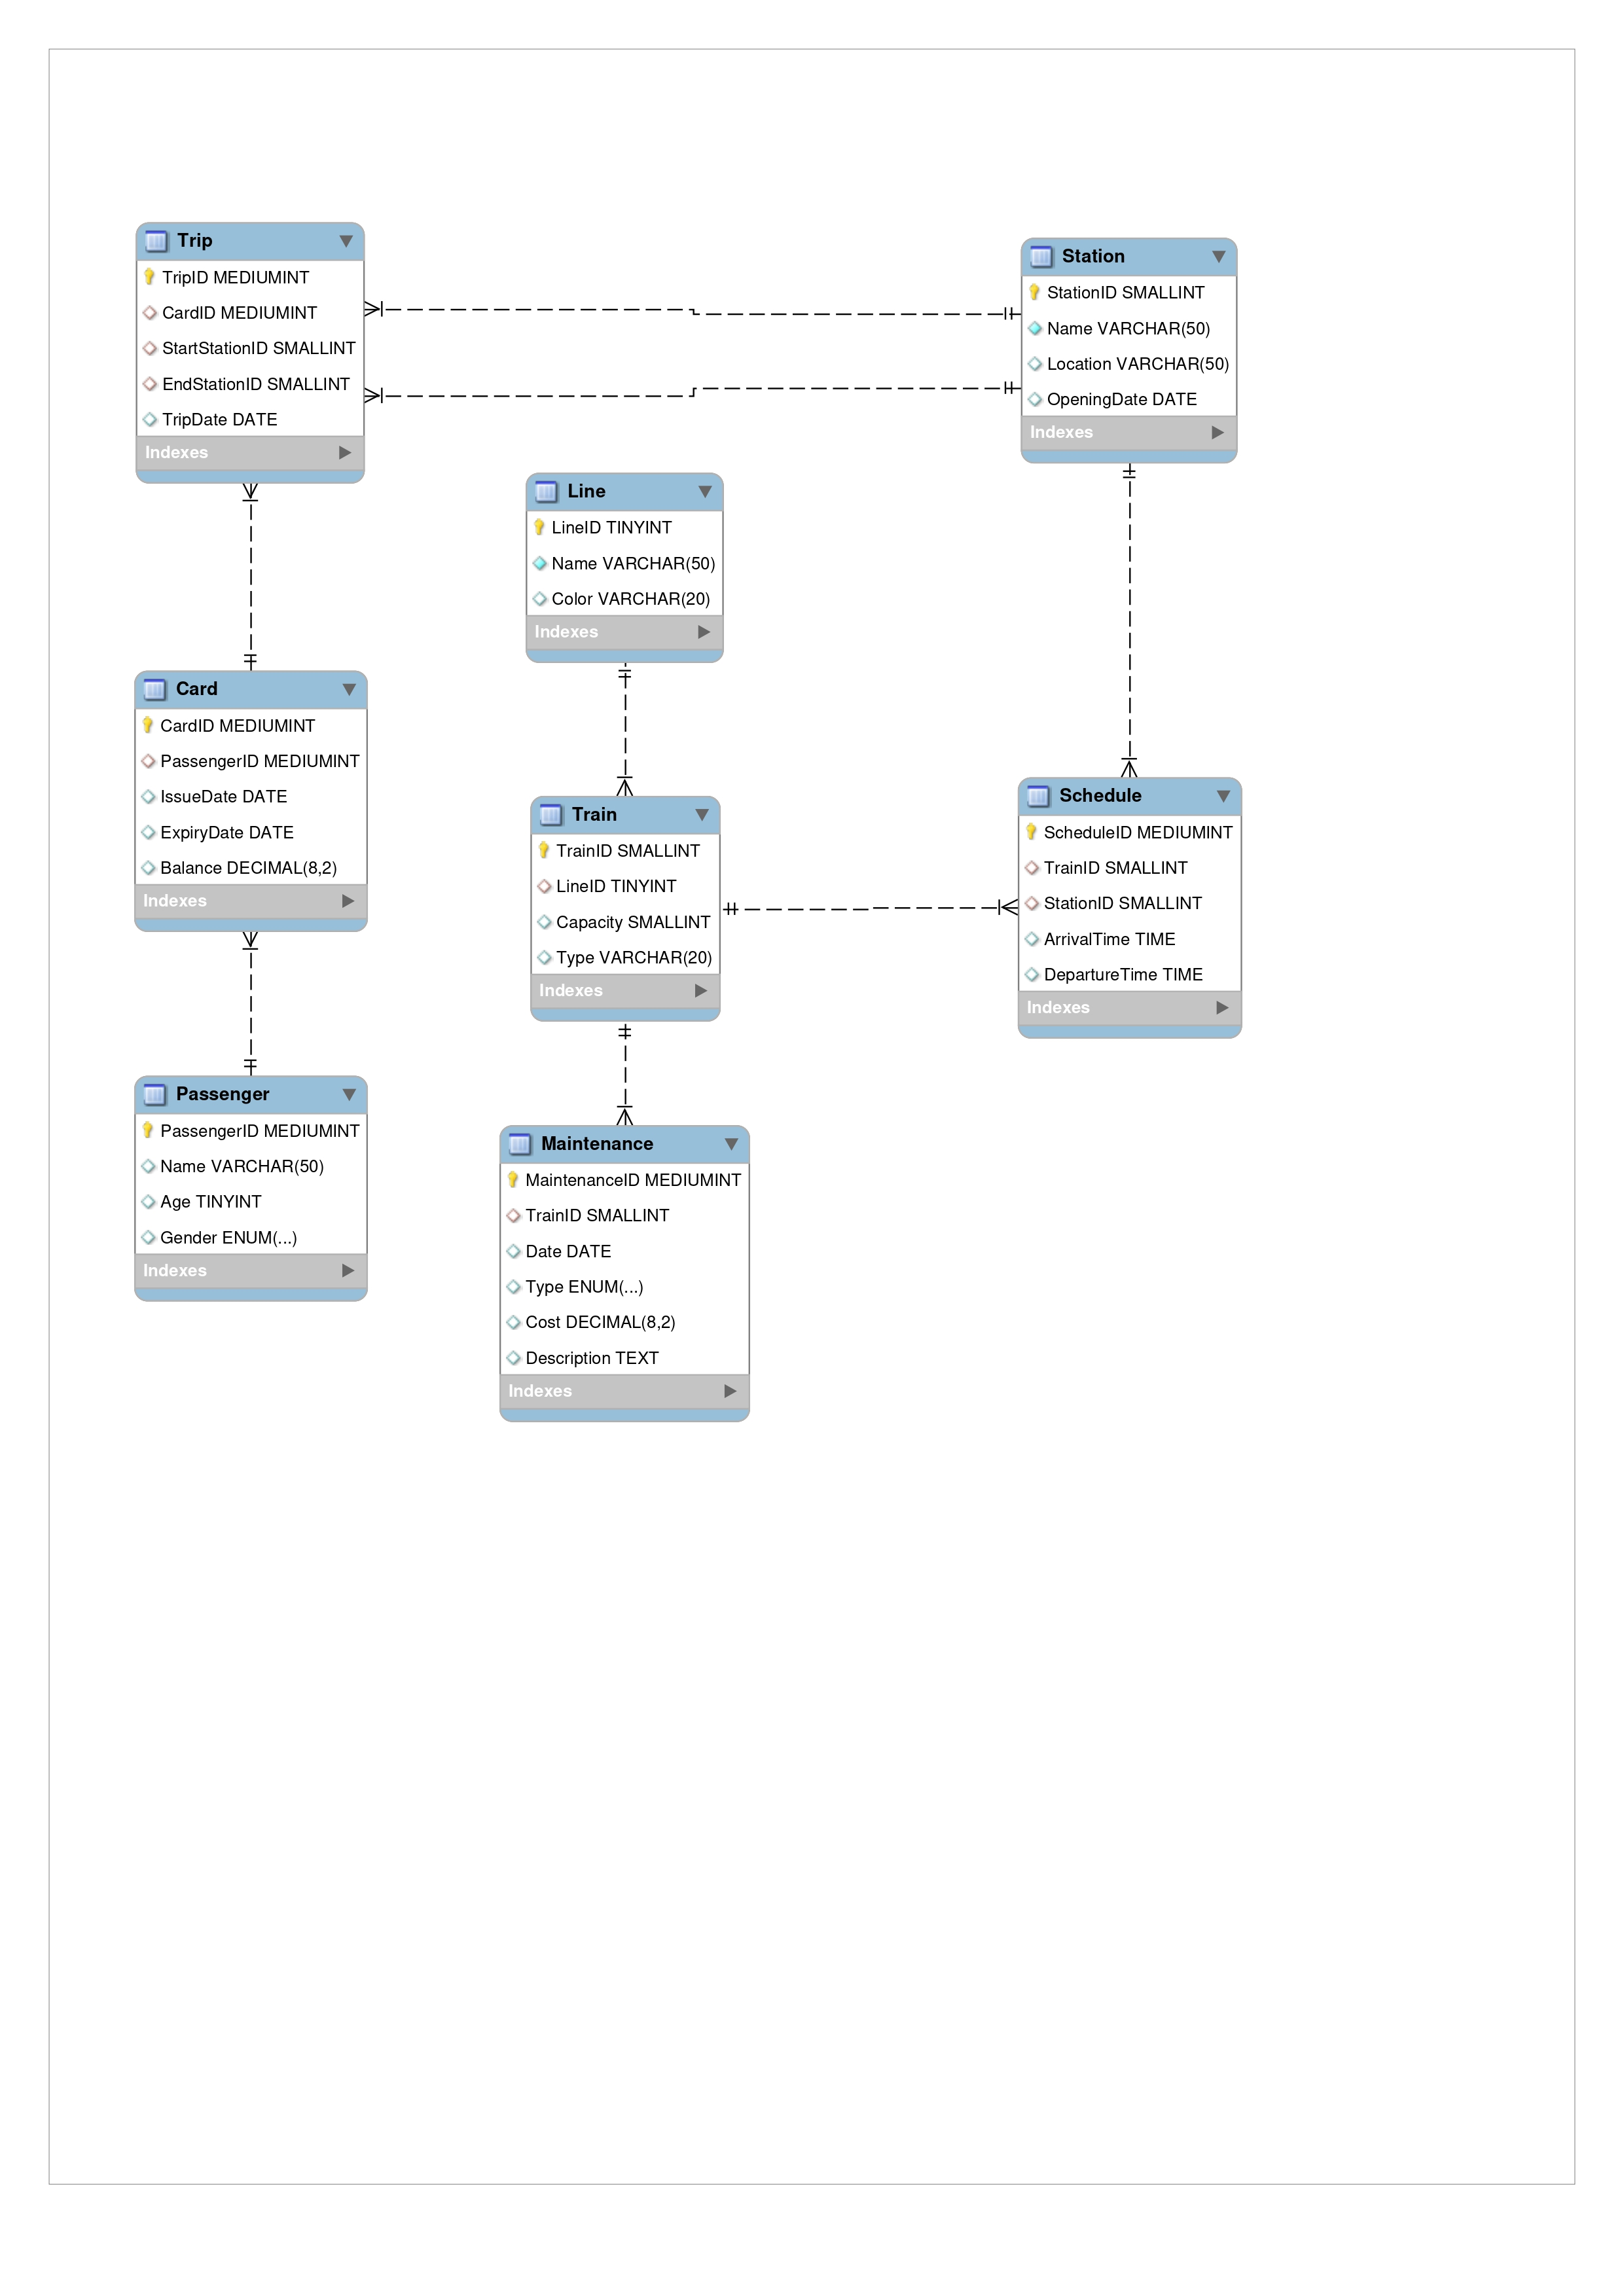


## **Relationships**

**1. Line and Train**
*   **Relationship Type:** One-to-Many
*   Each train is associated with a specific line, and a line can have multiple trains.


**2. Train and Schedule**
*   **Relationship Type:** One-to-Many
*   A train can appear in multiple schedules, but each schedule entry relates to one train.


**3. Station and Schedule**
*   **Relationship Type:** One-to-Many
*   A station can appear in multiple schedules, but each schedule entry relates to one station.


**4. Passenger and Card**
*   **Relationship Type:** One-to-Many
*   Each passenger can own multiple cards, but a card is linked to only one passenger.

**5. Card and Trip**
*   **Relationship Type:** One-to-Many
*   Each trip is linked to one card, but a card can have multiple trips logged.

**6. Station and Trip**
*   **Relationship Type:** One-to-Many
*   A Trip has a starting Station and an ending Station.

**7. Train and Maintenance**
*   **Relationship Type:** One-to-Many
*    Each maintenance record is linked to a train, but a train can have multiple maintenance records.





## **Database Creation**

* Create the database
```sql
CREATE DATABASE DMRC;
USE DMRC;
```

* Create Station Table
```sql
CREATE TABLE Station (
    StationID SMALLINT UNSIGNED PRIMARY KEY AUTO_INCREMENT,
    Name VARCHAR(50) NOT NULL,
    Location VARCHAR(50),
    OpeningDate DATE
);
```

* Create Line Table
```sql
CREATE TABLE Line (
    LineID TINYINT UNSIGNED PRIMARY KEY AUTO_INCREMENT,
    Name VARCHAR(50) NOT NULL,
    Color VARCHAR(20)
);
```

* Create Train Table
```sql
CREATE TABLE Train (
    TrainID SMALLINT UNSIGNED PRIMARY KEY AUTO_INCREMENT,
    LineID TINYINT UNSIGNED,
    Capacity SMALLINT UNSIGNED,
    Type VARCHAR(20),
    FOREIGN KEY (LineID) REFERENCES Line(LineID)
);
```

* Create Schedule Table
```sql
CREATE TABLE Schedule (
    ScheduleID MEDIUMINT UNSIGNED PRIMARY KEY AUTO_INCREMENT,
    TrainID SMALLINT UNSIGNED,
    StationID SMALLINT UNSIGNED,
    ArrivalTime TIME,
    DepartureTime TIME,
    FOREIGN KEY (TrainID) REFERENCES Train(TrainID),
    FOREIGN KEY (StationID) REFERENCES Station(StationID)
);
```

* Create Passenger Table
```sql
CREATE TABLE Passenger (
    PassengerID MEDIUMINT UNSIGNED PRIMARY KEY AUTO_INCREMENT,
    Name VARCHAR(50),
    Age TINYINT UNSIGNED,
    Gender ENUM('Male', 'Female', 'Other')
);
```

* Create Card Table
```sql
CREATE TABLE Card (
    CardID MEDIUMINT UNSIGNED PRIMARY KEY AUTO_INCREMENT,
    PassengerID MEDIUMINT UNSIGNED,
    IssueDate DATE,
    ExpiryDate DATE,
    Balance DECIMAL(8, 2),
    FOREIGN KEY (PassengerID) REFERENCES Passenger(PassengerID)
);
```
* Create Trip Table
```sql
CREATE TABLE Trip (
    TripID MEDIUMINT UNSIGNED PRIMARY KEY AUTO_INCREMENT,
    CardID MEDIUMINT UNSIGNED,
    StartStationID SMALLINT UNSIGNED,
    EndStationID SMALLINT UNSIGNED,
    TripDate DATE,
    FOREIGN KEY (CardID) REFERENCES Card(CardID),
    FOREIGN KEY (StartStationID) REFERENCES Station(StationID),
    FOREIGN KEY (EndStationID) REFERENCES Station(StationID)
);
```

* Create Maintenance Table
```sql
CREATE TABLE Maintenance (
    MaintenanceID MEDIUMINT UNSIGNED PRIMARY KEY AUTO_INCREMENT,
    TrainID SMALLINT UNSIGNED,
    Date DATE,
    Type ENUM('Routine', 'Repair', 'Upgrade'),
    Cost DECIMAL(8, 2),
    Description TEXT,
    FOREIGN KEY (TrainID) REFERENCES Train(TrainID)
);
```

## **User Creation and Privilege Assignment**

1. **Admin User**
   - **User**: `admin_user`
   - **Password**: `securepassword`
   - **Privileges**: Has full access to all tables within the DMRC database. This user can perform any operation, including creating, updating, and deleting data.
     ```sql
     CREATE USER CREATE USER 'admin_user'@'localhost' IDENTIFIED BY 'securepassword';
     GRANT ALL PRIVILEGES ON DMRC.* TO 'admin_user'@'localhost';
     FLUSH PRIVILEGES;
     ```

2. **Analyst User**
   - **User**: `analyst_user`
   - **Password**: `securepassword`
   - **Privileges**: Has read-only access, which is suitable for users who need to analyze data but should not modify it.
     ```sql
     CREATE USER 'analyst_user'@'localhost' IDENTIFIED BY 'securepassword';
     GRANT SELECT ON DMRC.* TO 'analyst_user'@'localhost';
     FLUSH PRIVILEGES;
     ```

3. **Maintenance User**
   - **User**: `maint_user`
   - **Password**: `securepassword`
   - **Privileges**: Can update and read records in the Maintenance and Train tables, reflecting the responsibilities of maintenance staff.
     ```sql
     CREATE USER 'maint_user'@'localhost' IDENTIFIED BY 'securepassword';
     GRANT SELECT, UPDATE ON DMRC.Maintenance TO 'maint_user'@'localhost';
     GRANT SELECT, UPDATE ON DMRC.Train TO 'maint_user'@'localhost';
     FLUSH PRIVILEGES;
     ```

4. **Operator User**
   - **User**: `operator_user`
   - **Password**: `securepassword`
   - **Privileges**: Can manage schedules and train details, reflecting the responsibilities of operations staff who need to update and add schedules.
     ```sql
     CREATE USER 'operator_user'@'localhost' IDENTIFIED BY 'securepassword';
     GRANT SELECT, INSERT, UPDATE ON DMRC.Schedule TO 'operator_user'@'localhost';
     GRANT SELECT, INSERT, UPDATE ON DMRC.Train TO 'operator_user'@'localhost';
     FLUSH PRIVILEGES;
     ```




